# Тема “Введение в спортивный анализ данных, Exploration Data Analysis.”



<b>В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing



Задания:
<ol>
<li><a href="#task_1">Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

</a>
<li><a href = "#task_2">Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.</a>
<li><a href = "#task_3">Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).</a>
<li><a href = "#task_4">Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.</a>
<li><a href = "#task_5">Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.
</a>
<li><a href = "#task_6">Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).
</a>
<li><a href = "#task_7">Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.
</a>
<li><a href = "#task_8">Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.
</a>
<li><a href = "#task_9">Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.
</a>
</ol>

<ol>
Задание на повторение:
    
    Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.
<li><a href = "#task_2_1">Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.
</a>
<li><a href = "#task_2_2">Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.
</a>
<li><a href = "#task_2_3">Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.
</a>
<li><a href = "#task_2_4">Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.
</a>
</ol>

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [2]:
def optimization_memory_usage(df):
    """ 
    Функция оптимизации числовых значений по int[8, 16, 32, 64] по float[16, 32, 64]
    """
    start_memory_usage = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe is {start_memory_usage:.2f} MB')
    
    for column in df.columns:
        column_type = df[column].dtype
        
        if column_type != object:
            col_min = df[column].min()
            col_max = df[column].max()
            if str(column_type)[:3] == 'int':
                if col_min > np.iinfo(np.int8).min and col_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)

                elif col_min > np.iinfo(np.int16).min and col_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)

                elif col_min > np.iinfo(np.int32).min and col_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)

                elif col_min > np.iinfo(np.int64).min and col_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64) 
            else:
                if col_min > np.finfo(np.float16).min and col_max < np.finfo(np.float16).max:
                    df[column] = df[column].astype(np.float16)

                elif col_min > np.finfo(np.float32).min and col_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)

                else:
                    df[column] = df[column].astype(np.float64)

    end_memory_usage = df.memory_usage().sum() / 1024**2
    percent_optimization  = 100 * (start_memory_usage - end_memory_usage) / start_memory_usage
    print(f'Memory usage after optimization is: {end_memory_usage:.2f} MB')
    print(f'Decreased by {percent_optimization:.1f}%')
    
    return df


def base_describe(data, data_name):
    _describe = pd.DataFrame(columns=[data_name])
    _describe.loc['Количество наблюдений', data_name] = data.shape[0]
    _describe.loc['Количество признаков', data_name] = data.shape[1]
    
    for k, v in data.dtypes.value_counts().items():
        _describe.loc[f'Признаков {k}', data_name] = v
        
    list_nan = [i for i in data.count() if i != data.shape[0]]
    _describe.loc[f'Признаков с NaN', data_name] = len(list_nan)
    
    dict_num = {'disc': 0, 'cont': 0}
    for i in data.columns:
        if data[i].dtype != 'object':
            if data[i].nunique() < 21:
                dict_num['disc'] += 1
            else:
                dict_num['cont'] += 1          
    _describe.loc[f'Дискретных признаков', data_name] = dict_num['disc']
    _describe.loc[f'Непрерывных признаков', data_name] = dict_num['cont']
    return _describe


In [3]:
print(f"int8:\n\t min{np.iinfo(np.int8).min};\n\t max{np.iinfo(np.int8).min}")
print(f"int16:\n\t min{np.iinfo(np.int16).min};\n\t max{np.iinfo(np.int16).min}")
print(f"int32:\n\t min{np.iinfo(np.int32).min};\n\t max{np.iinfo(np.int32).min}")
print(f"int64:\n\t min{np.iinfo(np.int64).min};\n\t max{np.iinfo(np.int64).min}")
print(f"float16:\n\t min{np.finfo(np.float16).min};\n\t max{np.finfo(np.float16).min}")
print(f"float32:\n\t min{np.finfo(np.float32).min};\n\t max{np.finfo(np.float32).min}")
print(f"float64:\n\t min{np.finfo(np.float64).min};\n\t max{np.finfo(np.float64).min}")


int8:
	 min-128;
	 max-128
int16:
	 min-32768;
	 max-32768
int32:
	 min-2147483648;
	 max-2147483648
int64:
	 min-9223372036854775808;
	 max-9223372036854775808
float16:
	 min-65504.0;
	 max-65504.0
float32:
	 min-3.4028234663852886e+38;
	 max-3.4028234663852886e+38
float64:
	 min-1.7976931348623157e+308;
	 max-1.7976931348623157e+308


## Загрузка данных

In [4]:
train_df = pd.read_csv('../data/assignment_2_train.csv')
test_df = pd.read_csv('../data/assignment_2_test.csv')

In [5]:
statistic_train = base_describe(data=train_df, data_name='train')
statistic_test= base_describe(data=test_df, data_name='test')

statistic_df = pd.concat([statistic_train, statistic_test], axis=1)
statistic_df

,train,test
Количество наблюдений,180000,100001
Количество признаков,394,394
Признаков float64,376,376
Признаков object,14,14
Признаков int64,4,4
Признаков с NaN,319,299
Дискретных признаков,173,208
Непрерывных признаков,207,172


In [6]:
train_df = optimization_memory_usage(train_df)

Memory usage of dataframe is 541.08 MB
Memory usage after optimization is: 158.10 MB
Decreased by 70.8%


In [7]:
test_df = optimization_memory_usage(test_df)

Memory usage of dataframe is 300.60 MB
Memory usage after optimization is: 83.45 MB
Decreased by 72.2%


In [8]:
TARGET_NAME = 'isFraud'
DROP_NAMES = ['TransactionID']

In [9]:
train_df[TARGET_NAME].value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

In [10]:
pd.options.display.max_columns = 380

In [11]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.0,179997.0,179047.0,160567.0,160567.0,60605.0,14458.0,180000.0,180000.0,180000.000000,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,80302.0,83038.0,106927.0,68756.0,24236.0,11676.0,3.359600e+04,33596.000000,134335.0,59099.0,20804.0,18667.0,20544.0,131181.0,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,59099.000000,134322.0,134322.0,134322.0,134322.000000,134322.000000,134322.000000,134322.000000,134322.0,134322.0,134322.000000,134322.000000,134322.0,134322.0,134322.0,134322.0,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,134322.000000,106921.000000,106921.000000,106921.0,106921.0,106921.000000,106921.000000,106921.0,106921.000000,106921.000000,106921.0,106921.0,106921.0,106921.0,106921.000000,106921.000000,106921.000000,106921.000000,106921.000000,134089.0,134089.0,134089.0,134089.0,134089.000000,134089.000000,134089.000000,134089.000000,134089.0,134089.0,134089.000000,134089.000000,134089.0,134089.0,134089.0,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,134089.000000,131173.000000,131173.0,131173.0,131173.0,131173.000000,131173.000000,131173.000000,131173.0,131173.0,131173.000000,131173.000000,131173.0,131173.0,131173.0,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,131173.000000,180000.000000,180000.0,180000.0,180000.000000,180000.0,180000.000000,180000.00000,180000.0,180000.000000,180000.000000,180000.000000,180000.000000,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.000000,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,180000.0,47826.000000,47826.00000,47826.00000,47826.000000,47826.000000,4.782600e+04,47826.0000,47826.0,47826.000000,47826.000000,47826.000000,47826.000000,47826.0,4.782600e+04,47826.0,47826.000000,47826.000000,47826.000000,47826.000000,47826.000000,478

In [12]:
test_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000010e+05,100001.000000,1.000010e+05,100001.000000,100001.000000,98325.0,99185.0,98701.0,88300.0,88300.0,39103.0,4360.0,100001.0,100001.0,100001.000000,100001.000000,100001.0,100001.0,100001.000000,100001.0,100001.0,100001.0,100001.0,100001.000000,100001.0,100001.0,99732.0,53475.0,57535.0,79300.0,51368.0,11065.0,6062.0,9458.000000,9458.000000,93964.0,66962.0,10316.0,10716.0,10299.0,90682.0,66962.0,66962.0,66962.0,66962.000000,66962.000000,66962.0,66962.0,66962.0,66962.0,66962.000000,66962.00000,93959.000000,93959.000000,93959.0,93959.000000,93959.000000,93959.000000,93959.000000,93959.0,93959.0,93959.000000,93959.000000,93959.0,93959.0,93959.0,93959.0,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,93959.000000,79286.000000,79286.000000,79286.0,79286.0,79286.000000,79286.000000,79286.0,79286.000000,79286.000000,79286.0,79286.0,79286.0,79286.0,79286.000000,79286.000000,79286.000000,79286.000000,79286.000000,93581.000000,93581.000000,93581.0,93581.0,93581.000000,93581.000000,93581.000000,93581.000000,93581.0,93581.0,93581.000000,93581.000000,93581.0,93581.0,93581.0,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,93581.000000,90676.000000,90676.000000,90676.0,90676.0,90676.000000,90676.000000,90676.000000,90676.0,90676.0,90676.000000,90676.000000,90676.0,90676.0,90676.0,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,100001.000000,100001.0,100001.00000,100001.000000,100001.0,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0000,100001.0,100001.0,100001.00000,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,100001.0,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000,6725.0,6725.0,6725.000000,6725.000000,6725.000000,6725.0,6725.0,6725.0,1

## Выполнение заданий

<p><a name="task_1"></a></p>

### Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).


In [13]:
target = train_df[TARGET_NAME]
number_features_train = train_df.select_dtypes(include=[np.number])

DROP_NAMES.append(TARGET_NAME)

number_features_train = number_features_train.drop(DROP_NAMES, axis=1)


print(f'Target name: {TARGET_NAME}\n'
      f'Drop names: {DROP_NAMES}\n')

number_features_train.head(3)

Target name: isFraud
Drop names: ['TransactionID', 'isFraud']



,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [33]:
train_df = train_df.drop(columns=DROP_NAMES)
train_df

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3958217,39.00,W,1877,310.0,150.0,mastercard,224.0,debit,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3958237,59.95,W,10075,514.0,150.0,mastercard,224.0,debit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3958241,34.00,W,6053,122.0,150.0,mastercard,195.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3958260,59.00,W,7726,555.0,150.0,visa,226.0,debit,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
train_df.head(3)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

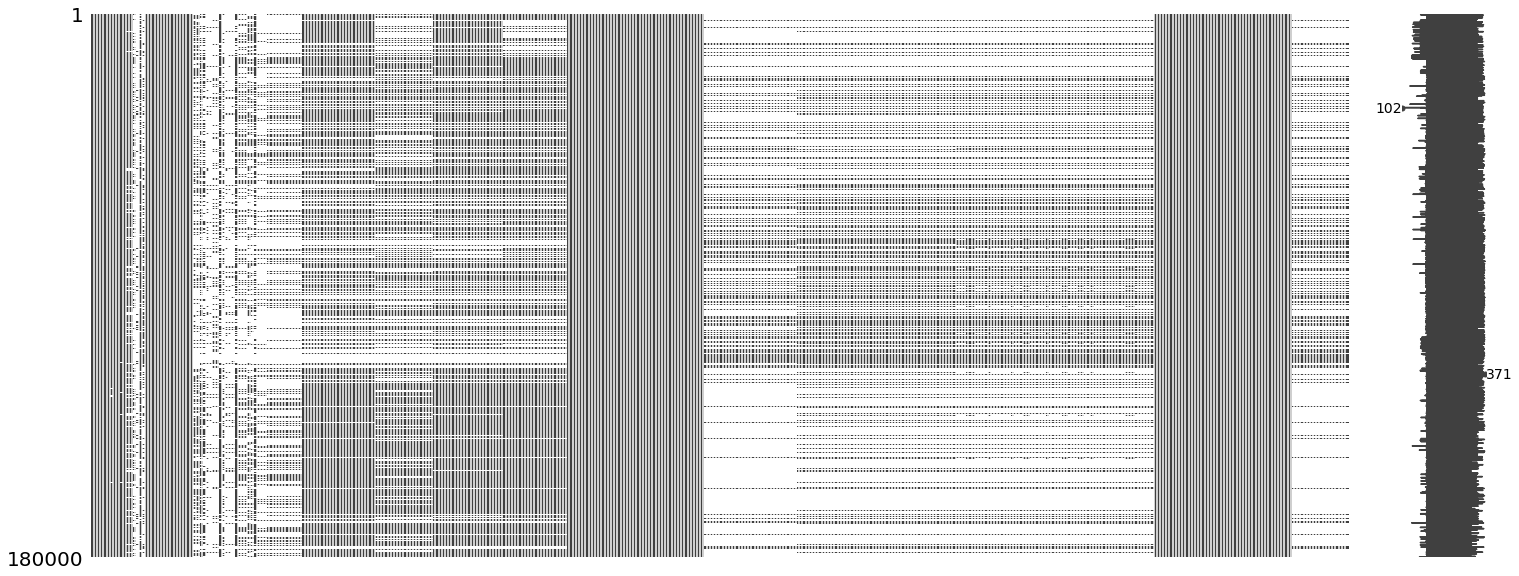

In [16]:
msno.matrix(train_df)

#### Test_df

In [36]:
print(f'Shape: {test_df.shape}\n')
test_df.info()
test_df.head()

Shape: (100001, 394)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 300.6+ MB


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,0,7415111,171.00,W,11556,309.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,0,7415112,107.95,W,10985,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
test_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.000010e+05,100001.000000,1.000010e+05,100001.000000,100001.000000,98325.000000,99185.000000,98701.000000,88300.000000,88300.000000,...,6774.000000,6774.000000,6774.000000,6774.000000,6774.000000,6774.000000,6774.000000,6774.000000,6774.000000,6774.000000
mean,3.337000e+06,0.038040,8.696663e+06,140.674821,9882.200528,357.652672,153.271785,198.466672,289.507758,86.863941,...,0.192944,81.733429,123.824365,91.572815,6.744021,36.245940,11.969737,47.597468,52.675413,48.497675
std,2.886795e+04,0.191293,7.603909e+05,240.272633,4867.290775,156.984512,11.512903,41.495035,101.589641,2.143002,...,0.606917,715.898781,777.526194,718.203590,214.832591,269.734936,216.315923,597.985868,600.451426,598.024560
min,3.287000e+06,0.000000,7.415038e+06,0.251000,1004.000000,100.000000,100.000000,100.000000,104.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.312000e+06,0.000000,8.023328e+06,44.529000,6019.000000,206.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.337000e+06,0.000000,8.630067e+06,73.970000,9633.000000,360.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.362000e+06,0.000000,9.346592e+06,134.950000,14065.000000,500.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,79.750000,39.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.387000e+06,1.000000,1.009155e+07,5543.230000,18395.000000,600.000000,229.000000,237.000000,536.000000,96.000000,...,6.000000,35176.500000,35176.500000,35176.500000,12307.500000,12307.500000,12307.500000,25000.000000,25000.000000,25000.000000


In [38]:
numerical_features_test = test_df.select_dtypes(include=[np.number])
print(f"count of numeric_features_test {numerical_features_test.shape[1]}")

numerical_features_test.columns

count of numeric_features_test 380


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)

In [39]:
test_df = test_df.drop(columns=DROP_NAMES)

<p><a name="task_2"></a></p>

### Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1

<p><a name="task_3"></a></p>

### Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

<p><a name="task_4"></a></p>

#### Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4. 

<p><a name="task_5"></a></p>

#### Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

<p><a name="task_6"></a></p>

#### Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

<p><a name="task_7"></a></p>

#### Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

<p><a name="task_8"></a></p>

#### Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

<p><a name="task_9"></a></p>

#### Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

<p><a name="task_2_1"></a></p>

#### Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

<p><a name="task_2_2"></a></p>

#### Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

<p><a name="task_2_3"></a></p>

#### ЗЗадание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

<p><a name="task_2_4"></a></p>

#### Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.